In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\CHARAN\Downloads\Company_Data.csv")

In [4]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
list(df)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [6]:
median_sales=df["Sales"].median()
df["Sales"]=["High" if value> median_sales
            else "Low" for value in df["Sales"]]
df["Sales"]
             

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
column_to_encoder=["ShelveLoc","Urban","US","Sales"]
for column in column_to_encoder:
  df[column]=LE.fit_transform(df[column])
df
     

    

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [8]:
X =df.iloc[:,1:]
Y =df["Sales"]


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)


In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

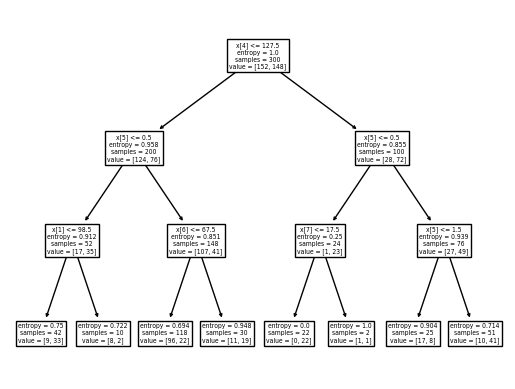

In [22]:
from sklearn import tree
tree.plot_tree(model);

In [23]:
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    52
1    48
Name: count, dtype: int64

In [24]:
preds

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [26]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales,,
0,32,15
1,20,33


In [29]:
import numpy as np
np.mean(preds==Y_test)

0.65

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion='poisson',max_depth=6)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [33]:
DT.tree_.max_depth
DT.tree_.node_count

53

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train,Y_pred_train)
print("Mean squared error: ", mse.round(3))

Mean squared error:  0.101


In [35]:
import numpy as np
print("Root Mean squared error: ", np.sqrt(mse).round(3))
     

Root Mean squared error:  0.318


In [36]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [37]:
conda install python-graphviz



Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2




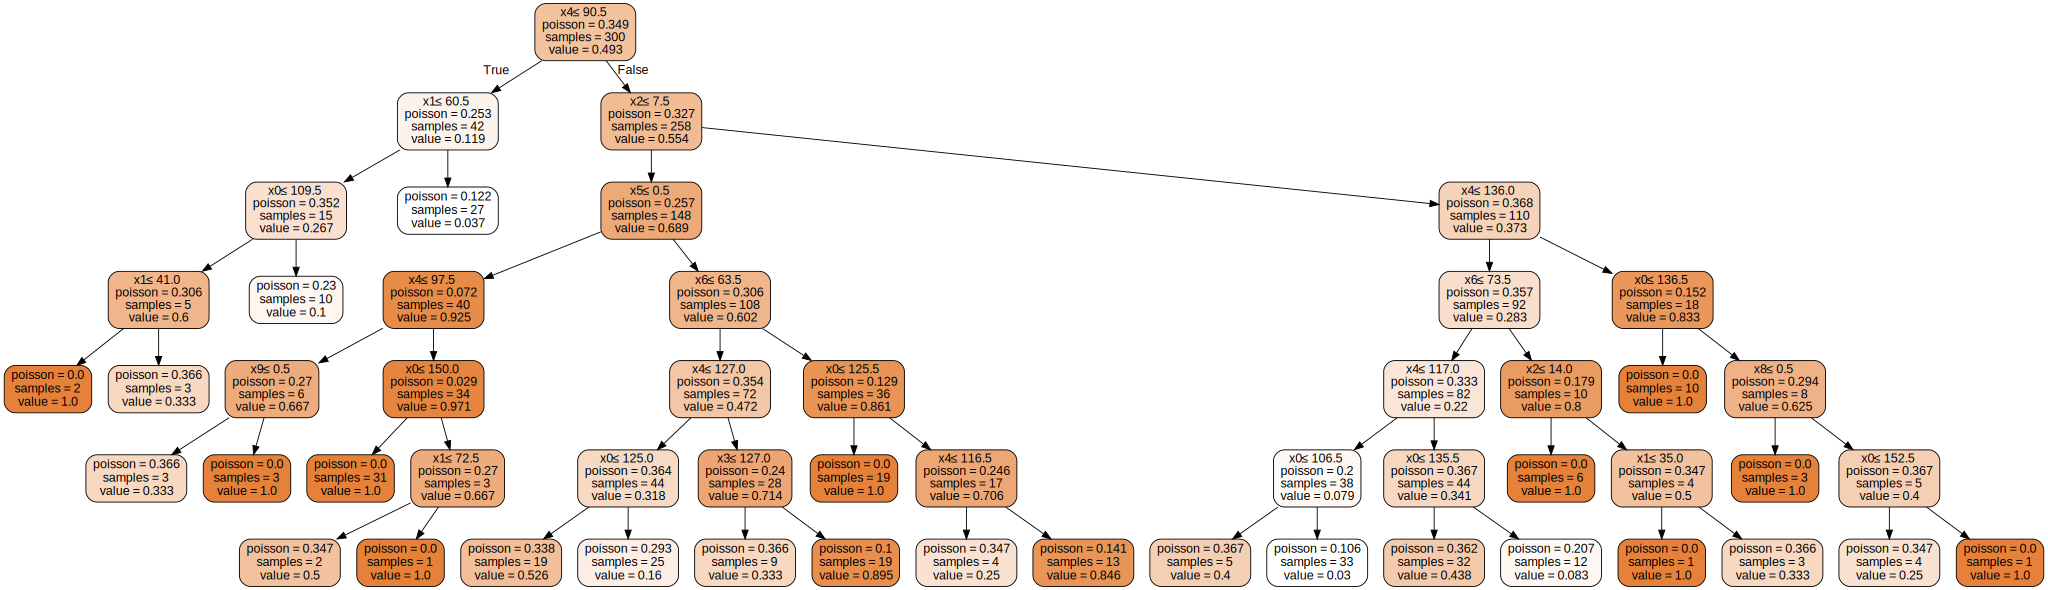

In [38]:
from sklearn import tree
import graphviz

# Assuming DT is a trained decision tree model (if not, train it before plotting)

dot_data = tree.export_graphviz(DT, filled=True, rounded=True, special_characters=True)

# Create a Graphviz Source object
graph = graphviz.Source(dot_data)

# Increase the size (optional)
if isinstance(graph, (graphviz.Digraph, graphviz.Graph)):  # Check graph type
    graph.graph_attr['size'] = '25,20!'  # Adjust the size as needed (width, height)
else:
    print("Warning: Graph type not supported for size modification.")

graph = graphviz.Source(dot_data)
graph

# Q2

In [39]:
data = pd.read_csv(r"C:\Users\CHARAN\Downloads\Fraud_check.csv")

In [40]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [41]:
data1= ['Risky' if x <= 30000 else 'Good' for x in data['Taxable.Income']]
     

In [42]:
data.drop('Taxable.Income', axis=1, inplace=True)

In [43]:
data['taxable_income'] = data1
print(data)

    Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0          NO         Single            50047               10   YES   
1         YES       Divorced           134075               18   YES   
2          NO        Married           160205               30   YES   
3         YES         Single           193264               15   YES   
4          NO        Married            27533               28    NO   
..        ...            ...              ...              ...   ...   
595       YES       Divorced            39492                7   YES   
596       YES       Divorced            55369                2   YES   
597        NO       Divorced           154058                0   YES   
598       YES        Married           180083               17    NO   
599        NO       Divorced           158137               16    NO   

    taxable_income  
0             Good  
1             Good  
2             Good  
3             Good  
4             Good  
..       

In [44]:
Y = data["taxable_income"]
X = data.iloc[:,0:5]
list(X)

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [45]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X["Undergrad"]=LE.fit_transform(X["Undergrad"])
X["Marital.Status"]=LE.fit_transform(X["Marital.Status"])
X["Urban"]=LE.fit_transform(X["Urban"])

In [46]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y)


In [49]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


DT = DecisionTreeClassifier(criterion='gini',max_depth=6)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

DT.tree_.max_depth
DT.tree_.node_count


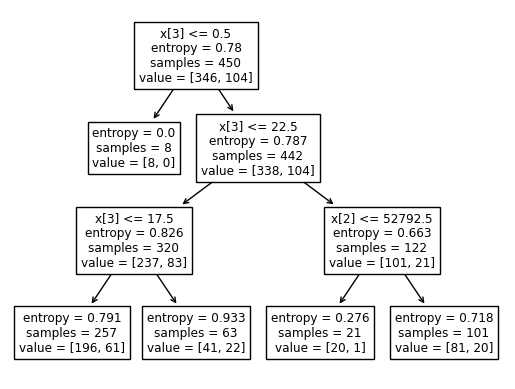

In [50]:
tree.plot_tree(model);

In [52]:
preds = model.predict(X_test) 
pd.Series(preds).value_counts() 

Good    150
Name: count, dtype: int64

In [54]:
pd.crosstab(Y_test,preds)

col_0,Good
taxable_income,
Good,130
Risky,20


In [56]:
np.mean(preds==Y_test)

0.8666666666666667

In [57]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [58]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [59]:
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.8666666666666667